In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
df = pd.read_csv('heart.csv') 

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # or .fillna('Unknown')

df.to_csv('cleaned_heart_data.csv', index=False)


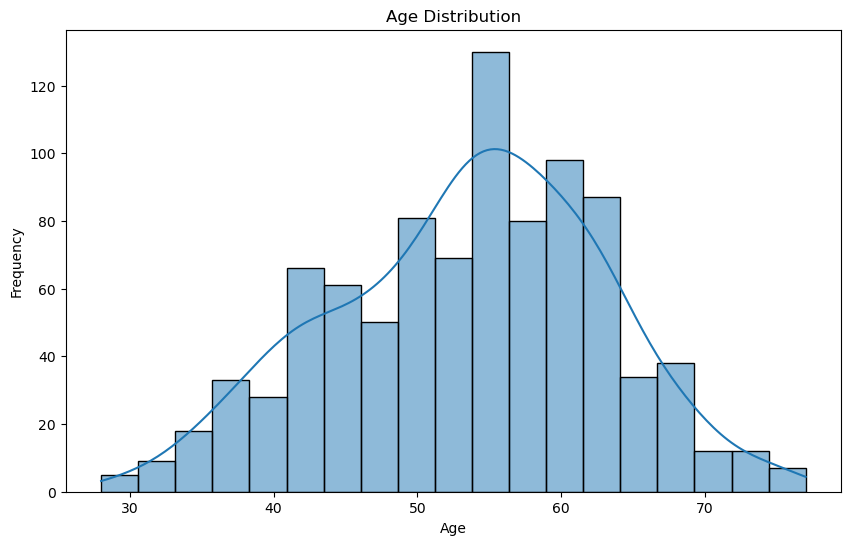

In [50]:
# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


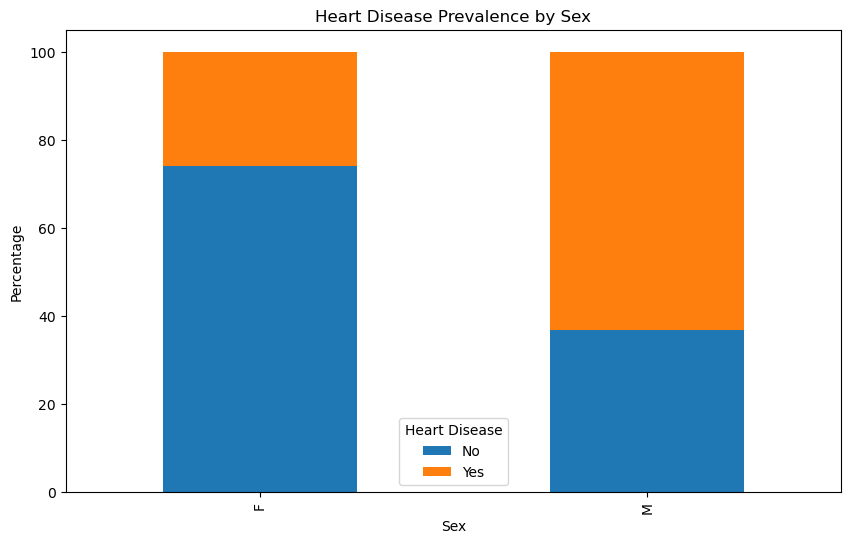

In [42]:
# Calculate proportions
heart_disease_sex = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True).unstack() * 100

# Stacked Bar Chart
heart_disease_sex.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


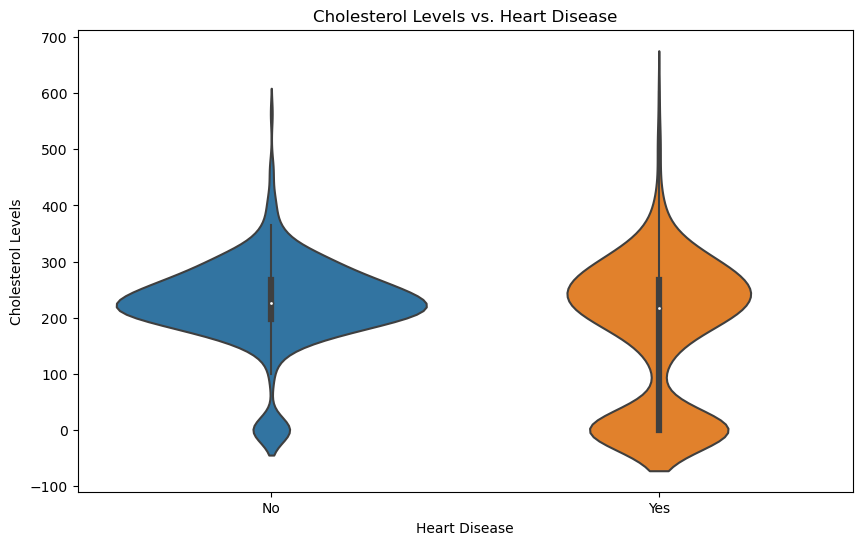

In [51]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


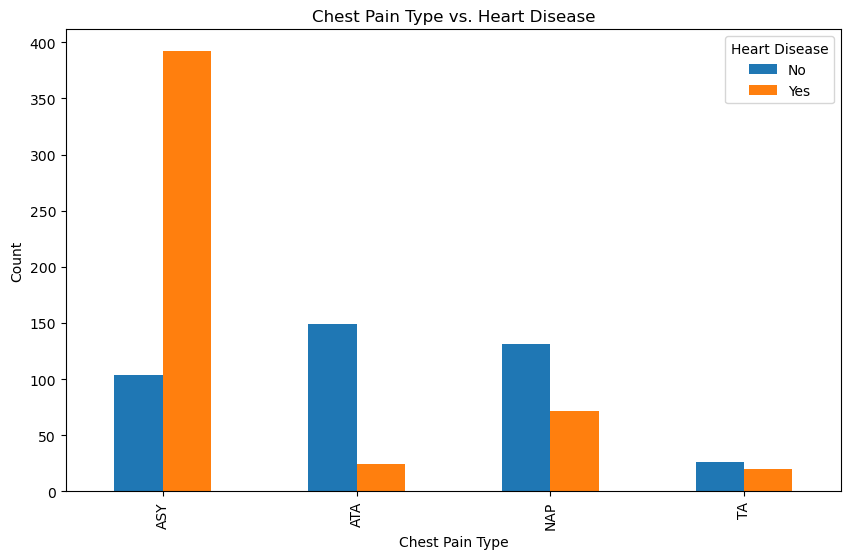

In [44]:
chest_pain_counts = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
chest_pain_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


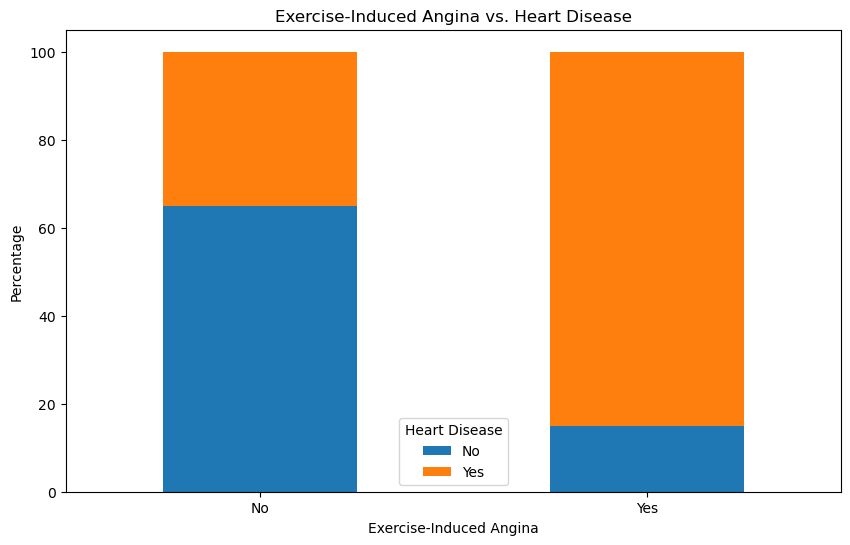

In [45]:
exercise_angina = df.groupby('ExerciseAngina')['HeartDisease'].value_counts(normalize=True).unstack() * 100

# Stacked Bar Chart
exercise_angina.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Exercise-Induced Angina vs. Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()
